# Match item_title with case_title

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv("./data/test_data1017(in) .csv")
df.head()

,Unnamed: 0,extern_id,linked_items,itemcreationdate,item_title,case_id,case_title,performed_work
0,0,51255,"[50401, 51255]",7/14/2025,"EQF CN IDC23 Display freeze, screen stuck. PU ...",4270191,客户反映黑屏,客户反映车辆黑屏，进行车辆检查车辆故障不存在，进行客户交流客户反映车辆停放一夜第二天刚启动正...
1,1,51255,[51255],7/14/2025,"EQF CN IDC23 Display freeze, screen stuck. PU ...",4230193,CID touch function failure,The fault symptom can be reproduced.\nWhen eve...
2,2,51830,[51830],8/5/2025,CN_B48 TU2 - DME High-pressure fuel system fau...,4422054,燃油高压系统，冷机起动时的油轨压力低,\n1.车辆故障是在今天早上启动出现的。\n\n2.客户驾驶车辆到店后无相关报警提示。\n\...
3,3,52118,[52118],8/15/2025,CCI_CN_SQ Music added in O-247 without offer m...,4299605,[CIC][MyCar][Store][SQ]尊享型互联驾驶组合包含无损音质要求QQ音乐无损...,1. 购买offer的名称：QQ音乐无损音质\n2. 购买offer的时间：2025-04-...
4,4,52077,[52077],8/13/2025,"TSARA_CN_G6x, G70 A/C flap motor locking detec...",4357502,左前空调出风口不出风,1.确认故障存在，左前出风口不出风。进场时故障现象一直存在。\n2.ISTA检测发现存在：8...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6077 entries, 0 to 6076
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        6077 non-null   int64 
 1   extern_id         6077 non-null   int64 
 2   linked_items      6077 non-null   object
 3   itemcreationdate  6077 non-null   object
 4   item_title        6077 non-null   object
 5   case_id           6077 non-null   int64 
 6   case_title        6077 non-null   object
 7   performed_work    6077 non-null   object
dtypes: int64(3), object(5)
memory usage: 379.9+ KB


6077行数据 177种item,2135种case（为什么不是6077种case？）
筛选出case相同的一组数据看一下
发现有重复的数据，直接删掉（重复是什么含义？看不出来，也没有标记case的日期，重复的项目之间没有区别）

In [8]:
df["extern_id"].nunique(),df["item_title"].nunique(),df["case_id"].nunique(),

(177, 177, 2135)

In [10]:
dup_ids = df["case_id"][df["case_id"].duplicated(keep=False)]
dup_ids

2       4422054
7       4000134
8       4149989
9       4211891
15      3973979
         ...   
6072    4243798
6073    4063910
6074    4194800
6075    4170802
6076    4189978
Name: case_id, Length: 4137, dtype: int64

In [16]:
duplicates = df[df["case_id"].isin(dup_ids)]
duplicates.to_csv("./data/duplicated.csv")

In [17]:
df["case_id"].unique()

array([4270191, 4230193, 4422054, ..., 4074257, 4126101, 4234724],
      shape=(2135,))

In [20]:
df.groupby("case_id").get_group(4189978).to_csv("./output/4189978.csv")

In [21]:
df_4189978 = pd.read_csv("./output/4189978.csv")
df_4189978

,Unnamed: 0.1,Unnamed: 0,extern_id,linked_items,itemcreationdate,item_title,case_id,case_title,performed_work
0,23,23,51141,[51141],7/9/2025,"CN_J01 DTC 23F80F,23F825,23F856,23F80A MIL war...",4189978,无法充电，高压电池单元3温度过高报警,1.客户反应仪表提示无法充电，驱动功率下降，车辆插上充电枪后提示无法充电，充电口亮红灯。\n...
1,486,486,51141,[51141],7/9/2025,"CN_J01 DTC 23F80F,23F825,23F856,23F80A MIL war...",4189978,无法充电，高压电池单元3温度过高报警,1.客户反应仪表提示无法充电，驱动功率下降，车辆插上充电枪后提示无法充电，充电口亮红灯。\n...
2,568,568,51141,[51141],7/9/2025,"CN_J01 DTC 23F80F,23F825,23F856,23F80A MIL war...",4189978,无法充电，高压电池单元3温度过高报警,1.客户反应仪表提示无法充电，驱动功率下降，车辆插上充电枪后提示无法充电，充电口亮红灯。\n...
3,1433,1433,51141,[51141],7/9/2025,"CN_J01 DTC 23F80F,23F825,23F856,23F80A MIL war...",4189978,无法充电，高压电池单元3温度过高报警,1.客户反应仪表提示无法充电，驱动功率下降，车辆插上充电枪后提示无法充电，充电口亮红灯。\n...
4,2555,2555,51141,[51141],7/9/2025,"CN_J01 DTC 23F80F,23F825,23F856,23F80A MIL war...",4189978,无法充电，高压电池单元3温度过高报警,1.客户反应仪表提示无法充电，驱动功率下降，车辆插上充电枪后提示无法充电，充电口亮红灯。\n...
5,2662,2662,51141,[51141],7/9/2025,"CN_J01 DTC 23F80F,23F825,23F856,23F80A MIL war...",4189978,无法充电，高压电池单元3温度过高报警,1.客户反应仪表提示无法充电，驱动功率下降，车辆插上充电枪后提示无法充电，充电口亮红灯。\n...
6,2767,2767,51141,[51141],7/9/2025,"CN_J01 DTC 23F80F,23F825,23F856,23F80A MIL war...",4189978,无法充电，高压电池单元3温度过高报警,1.客户反应仪表提示无法充电，驱动功率下降，车辆插上充电枪后提示无法充电，充电口亮红灯。\n...
7,3218,3218,51141,[51141],7/9/2025,"CN_J01 DTC 23F80F,23F825,23F856,23F80A MIL war...",4189978,无法充电，高压电池单元3温度过高报警,1.客户反应仪表提示无法充电，驱动功率下降，车辆插上充电枪后提示无法充电，充电口亮红灯。\n...
8,3553,3553,51141,[51141],7/9/2025,"CN_J01 DTC 23F80F,23F825,23F856,23F80A MIL war...",4189978,无法充电，高压电池单元3温度过高报警,1.客户反应仪表提示无法充电，驱动功率下降，车辆插上充电枪后提示无法充电，充电口亮红灯。\n...
9,4764,4764,51141,[51141],7/9/2025,"CN_J01 DTC 23F80F,23F825,23F856,23F80A MIL war...",4189978,无法充电，高压电池单元3温度过高报警,1.客户反应仪表提示无法充电，驱动功率下降，车辆插上充电枪后提示无法充电，充电口亮红灯。\n...


In [30]:
df.columns

Index(['Unnamed: 0', 'extern_id', 'linked_items', 'itemcreationdate',
       'item_title', 'case_id', 'case_title', 'performed_work'],
      dtype='object')

In [33]:
df = df.drop(columns=['Unnamed: 0'])
df

,extern_id,linked_items,itemcreationdate,item_title,case_id,case_title,performed_work
0,51255,"[50401, 51255]",7/14/2025,"EQF CN IDC23 Display freeze, screen stuck. PU ...",4270191,客户反映黑屏,客户反映车辆黑屏，进行车辆检查车辆故障不存在，进行客户交流客户反映车辆停放一夜第二天刚启动正...
1,51255,[51255],7/14/2025,"EQF CN IDC23 Display freeze, screen stuck. PU ...",4230193,CID touch function failure,The fault symptom can be reproduced.\nWhen eve...
2,51830,[51830],8/5/2025,CN_B48 TU2 - DME High-pressure fuel system fau...,4422054,燃油高压系统，冷机起动时的油轨压力低,\n1.车辆故障是在今天早上启动出现的。\n\n2.客户驾驶车辆到店后无相关报警提示。\n\...
3,52118,[52118],8/15/2025,CCI_CN_SQ Music added in O-247 without offer m...,4299605,[CIC][MyCar][Store][SQ]尊享型互联驾驶组合包含无损音质要求QQ音乐无损...,1. 购买offer的名称：QQ音乐无损音质\n2. 购买offer的时间：2025-04-...
4,52077,[52077],8/13/2025,"TSARA_CN_G6x, G70 A/C flap motor locking detec...",4357502,左前空调出风口不出风,1.确认故障存在，左前出风口不出风。进场时故障现象一直存在。\n2.ISTA检测发现存在：8...
...,...,...,...,...,...,...,...
6072,50923,[50923],7/1/2025,CN_G09 Abnormal noise from EKK,4243798,EKK 异响,1.客户反映开空调噪音，对比同款车无此噪音，噪音来自于EKK，未启动发动机情况打开AC出现噪...
6073,52347,[52347],8/28/2025,CN_U12BEV_21F3Cx_Drivetrain system warning_EVE...,4063910,车辆提示驱动系统故障,1.ISTA检测报21F3C9高压线电池，电池单元模块4，部件保护：蓄电池紧急运行已启动。进...
6074,51506,[51506],7/22/2025,"CN_J01 DTC 23FB58,23FBE1,23FE8D,23FFE0 vehicle...",4194800,车辆充电故障后无法启动，拖车到店。,"检查车辆无事故及磕碰痕迹，检测存有故障23FE8D,23FB8E,23FDA4检测计划提示更..."
6075,50928,[50928],7/1/2025,CN_J01 DTC：23FDB1/23FDA4 the vehicle can not b...,4170802,车辆无法上电,1、车辆软件已经升级到最新\n2、车辆高低压断电，还是无法上电。PAD模式下蓄电池电压11....


In [ ]:
df = df.drop_duplicates()
df

,extern_id,linked_items,itemcreationdate,item_title,case_id,case_title,performed_work
0,51255,"[50401, 51255]",7/14/2025,"EQF CN IDC23 Display freeze, screen stuck. PU ...",4270191,客户反映黑屏,客户反映车辆黑屏，进行车辆检查车辆故障不存在，进行客户交流客户反映车辆停放一夜第二天刚启动正...
1,51255,[51255],7/14/2025,"EQF CN IDC23 Display freeze, screen stuck. PU ...",4230193,CID touch function failure,The fault symptom can be reproduced.\nWhen eve...
2,51830,[51830],8/5/2025,CN_B48 TU2 - DME High-pressure fuel system fau...,4422054,燃油高压系统，冷机起动时的油轨压力低,\n1.车辆故障是在今天早上启动出现的。\n\n2.客户驾驶车辆到店后无相关报警提示。\n\...
3,52118,[52118],8/15/2025,CCI_CN_SQ Music added in O-247 without offer m...,4299605,[CIC][MyCar][Store][SQ]尊享型互联驾驶组合包含无损音质要求QQ音乐无损...,1. 购买offer的名称：QQ音乐无损音质\n2. 购买offer的时间：2025-04-...
4,52077,[52077],8/13/2025,"TSARA_CN_G6x, G70 A/C flap motor locking detec...",4357502,左前空调出风口不出风,1.确认故障存在，左前出风口不出风。进场时故障现象一直存在。\n2.ISTA检测发现存在：8...
...,...,...,...,...,...,...,...
6056,52259,[52259],8/25/2025,CN_MGU22 no communication S0273 from PU2503,4355053,中央显示屏黑屏,老师，您好！\n我们已经进行以下操作：\n1.对车辆进行快测，存储S0273故障码无法与主机...
6059,51881,[51881],8/6/2025,"CN_MGU22 CID side black screen after PU2503, ...",4434162,显示屏黑屏,"1,显示屏黑屏，相关视频上传\n2ISTA诊断无相关故障码\n3拆除加装改装.断电，编程故障..."
6062,51109,"[46365, 51109]",7/8/2025,TSARA_CN G70 BEV expansion valve of heat pump ...,4074257,空调不制冷,1、客户来店反馈空调不制冷，要求检查\n2、经检查，确实存在客户所描述故障；\n3、ISTA...
6063,52011,[52011],8/11/2025,"CCI_[LSC][DataPrivacy][Inactive]]LSC off, data...",4126101,[HK][My Car][Vehicle Status] State of Charge i...,-


In [ ]:
# 2135种case_id，2146条不重复的数据，差的11条是什么？下面这11个case_id重复了两次，打印看看4238978
dup_case_ids = df["case_id"].value_counts()
dup_case_ids = dup_case_ids[dup_case_ids>1]
print(f"{len(dup_case_ids)}")
print(dup_case_ids)

11
case_id
4238978    2
4159180    2
4234845    2
4231894    2
4229047    2
4241097    2
4156045    2
4233230    2
4228950    2
4216657    2
4209552    2
Name: count, dtype: int64


In [40]:
df.groupby("case_id").get_group(4238978).to_csv("./output/m2m.csv")
df.groupby("case_id").get_group(4238978)

,extern_id,linked_items,itemcreationdate,item_title,case_id,case_title,performed_work
2179,51483,"[51483, 51499]",7/21/2025,CN_EQF_G48_MARS01_S0527 Programming abort: Amp...,4238978,EQF-G48 MARS/RAM 编程失败,"1. 执行多次编程,故障仍然存在.\n2. 车辆无任何车辆输出.\n3. FASTA数据已上传."
3450,51499,"[51483, 51499]",7/22/2025,LFBV: ISTA 4.54.31 MARS01 S0527 Programming ab...,4238978,EQF-G48 MARS/RAM 编程失败,"1. 执行多次编程,故障仍然存在.\n2. 车辆无任何车辆输出.\n3. FASTA数据已上传."


这说明一个case可以对应多个item，并非1对多的任务，而是多对多.
下面采取两条路线：
1. 去除这些重复数据，当作多对1来做（显然不合理）
2. 将任务调整为多对多
注意到linked_items将这两条重复的数据都放在了列表中，我们验证一下是不是所有的多对多的重复的数据都在linked_items字段中

In [ ]:
import json, ast
import pandas as pd

def to_list(x):
    if isinstance(x, list):
        return x
    if pd.isna(x):
        return []
    if isinstance(x, str):
        # 兼容 JSON 字符串 或 Python 列表字符串
        for loader in (json.loads, ast.literal_eval):
            try:
                v = loader(x)
                return v if isinstance(v, list) else [v]
            except Exception:
                pass
        return [x]
    return [x]

# 1) 找出重复的 case_id 列表
dup_case_ids = df["case_id"].value_counts()
dup_case_ids = dup_case_ids[dup_case_ids > 1].index.tolist()
print(dup_case_ids)
# 2) 检查每个重复 case_id
rows = []
for cid in dup_case_ids:
    g = df[df["case_id"] == cid]
    extern_ids = list(g["extern_id"].dropna())
    print(extern_ids)

    # 以该组第一条的 linked_items 为基准
    linked_items = to_list(g.iloc[0]["linked_items"])

    # 统一成字符串对齐，避免 123 vs "123" 类型不一致
    ext_set = set(map(str, extern_ids))
    linked_set = set(map(str, linked_items))

    all_in = ext_set.issubset(linked_set)
    print(all_in)
    missing = list(ext_set - linked_set)

    rows.append({
        "case_id": cid,
        "n_rows": len(g),
        "all_in_linked_items": all_in,
        "missing_extern_ids": missing,
        "extern_ids": extern_ids,
        "linked_items(first_row)": linked_items,
    })

check_df = pd.DataFrame(rows).sort_values(["all_in_linked_items", "case_id"])

# 3) 打印没有完全覆盖的 case_id
print(check_df.loc[~check_df["all_in_linked_items"], ["case_id", "n_rows", "missing_extern_ids"]])

# 如需导出：
# check_df.to_excel("重复case校验结果.xlsx", index=False)


[4238978, 4159180, 4234845, 4231894, 4229047, 4241097, 4156045, 4233230, 4228950, 4216657, 4209552]
[51483, 51499]
True
[51364, 51625]
True
[51870, 51668]
True
[51483, 51499]
True
[51499, 51483]
True
[51483, 51499]
True
[52203, 51321]
True
[51364, 51625]
True
[51483, 51499]
True
[51625, 51364]
True
[51486, 51227]
True
Empty DataFrame
Columns: [case_id, n_rows, missing_extern_ids]
Index: []


所以说，多条case_id对应一个linked_items，通过linked_items字段恢复为多对一的分类任务

In [44]:
df["extern_id"].nunique(),df["linked_items"].nunique(),df["case_id"].nunique(),

(177, 285, 2135)

考虑到285！=177+11，所以是否存在其他被省略的重复数据，对应了linked_items种的每一项？

In [45]:
df

,extern_id,linked_items,itemcreationdate,item_title,case_id,case_title,performed_work
0,51255,"[50401, 51255]",7/14/2025,"EQF CN IDC23 Display freeze, screen stuck. PU ...",4270191,客户反映黑屏,客户反映车辆黑屏，进行车辆检查车辆故障不存在，进行客户交流客户反映车辆停放一夜第二天刚启动正...
1,51255,[51255],7/14/2025,"EQF CN IDC23 Display freeze, screen stuck. PU ...",4230193,CID touch function failure,The fault symptom can be reproduced.\nWhen eve...
2,51830,[51830],8/5/2025,CN_B48 TU2 - DME High-pressure fuel system fau...,4422054,燃油高压系统，冷机起动时的油轨压力低,\n1.车辆故障是在今天早上启动出现的。\n\n2.客户驾驶车辆到店后无相关报警提示。\n\...
3,52118,[52118],8/15/2025,CCI_CN_SQ Music added in O-247 without offer m...,4299605,[CIC][MyCar][Store][SQ]尊享型互联驾驶组合包含无损音质要求QQ音乐无损...,1. 购买offer的名称：QQ音乐无损音质\n2. 购买offer的时间：2025-04-...
4,52077,[52077],8/13/2025,"TSARA_CN_G6x, G70 A/C flap motor locking detec...",4357502,左前空调出风口不出风,1.确认故障存在，左前出风口不出风。进场时故障现象一直存在。\n2.ISTA检测发现存在：8...
...,...,...,...,...,...,...,...
6056,52259,[52259],8/25/2025,CN_MGU22 no communication S0273 from PU2503,4355053,中央显示屏黑屏,老师，您好！\n我们已经进行以下操作：\n1.对车辆进行快测，存储S0273故障码无法与主机...
6059,51881,[51881],8/6/2025,"CN_MGU22 CID side black screen after PU2503, ...",4434162,显示屏黑屏,"1,显示屏黑屏，相关视频上传\n2ISTA诊断无相关故障码\n3拆除加装改装.断电，编程故障..."
6062,51109,"[46365, 51109]",7/8/2025,TSARA_CN G70 BEV expansion valve of heat pump ...,4074257,空调不制冷,1、客户来店反馈空调不制冷，要求检查\n2、经检查，确实存在客户所描述故障；\n3、ISTA...
6063,52011,[52011],8/11/2025,"CCI_[LSC][DataPrivacy][Inactive]]LSC off, data...",4126101,[HK][My Car][Vehicle Status] State of Charge i...,-


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2146 entries, 0 to 6068
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   extern_id         2146 non-null   int64 
 1   linked_items      2146 non-null   object
 2   itemcreationdate  2146 non-null   object
 3   item_title        2146 non-null   object
 4   case_id           2146 non-null   int64 
 5   case_title        2146 non-null   object
 6   performed_work    2146 non-null   object
dtypes: int64(2), object(5)
memory usage: 134.1+ KB


1. 2135x7 -> softmax -> 285
2. 分类任务
3. 跨语言（中英）对齐

下面是数据中可用的内容
- item_title: item的简单英文描述和大量缩写
- case_title：case的简单描述的中文标题
- performed_work： case的详细中文描述
    - 照片已经上传
    - 附件已上传
其中输入只有case_title和performed_work，因此
2135x2 -> [?xxx?] -> softmax -> 285

划分训练集和测试集
统计285种linked_items分别对应了多少个case_id

In [48]:
# 如果 linked_items 是列表，要先展开
import pandas as pd
import numpy as np

# 若 linked_items 是 list 或 "[...]" 字符串，先转
def to_list(x):
    if isinstance(x, list): return x
    if pd.isna(x): return []
    try:
        return eval(x)
    except:
        return [x]

df["linked_items"] = df["linked_items"].apply(to_list)

# 展开一对多
df_exploded = df.explode("linked_items")

# 统计每个 item 对应的 case_id 数
item_case_stats = (
    df_exploded.groupby("linked_items")["case_id"]
    .nunique()
    .reset_index(name="case_count")
    .sort_values("case_count", ascending=True)
)

print(item_case_stats.head(10))


    linked_items  case_count
0           4034           1
2           5548           1
3          13553           1
4          16161           1
6          17879           1
5          17743           1
7          19318           1
8          21363           1
13         28798           1
9          25918           1


C:\Users\ux018677\AppData\Local\Temp\ipykernel_22888\2108569282.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["linked_items"] = df["linked_items"].apply(to_list)


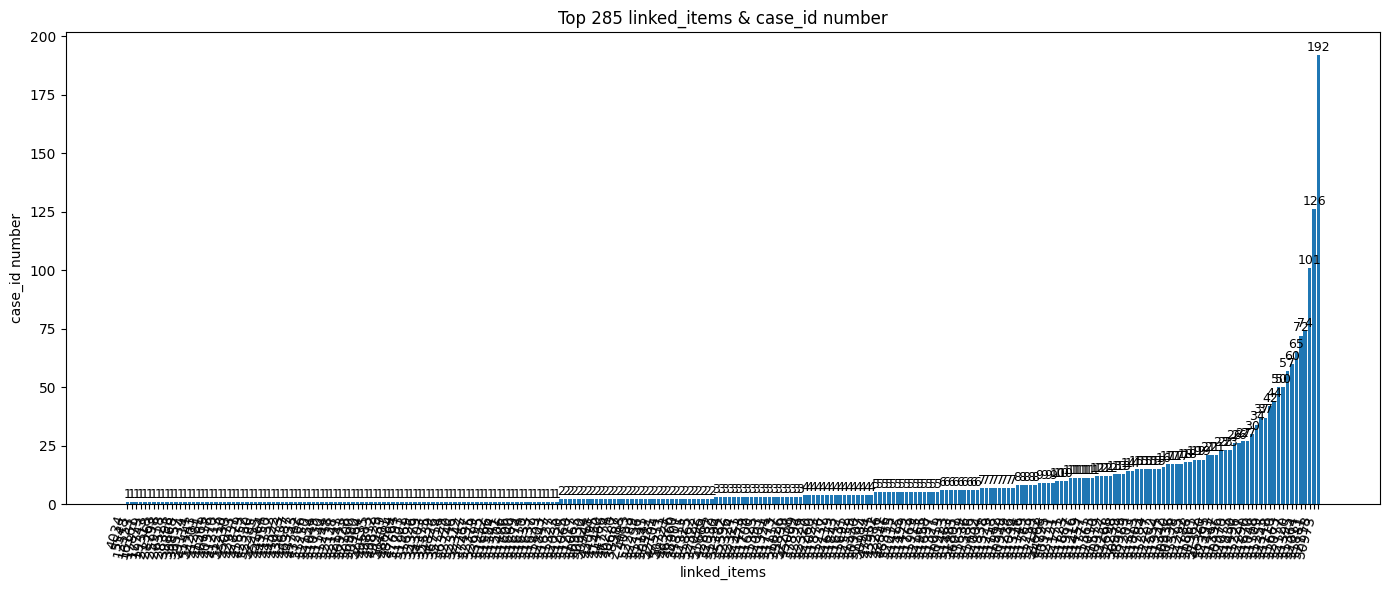

In [52]:
# 画出item_case_stats的分布柱状图，表上每个柱子有对应几个数据
import matplotlib.pyplot as plt
import pandas as pd

top_n = 285
data = item_case_stats.head(top_n)

plt.figure(figsize=(14, 6))
bars = plt.bar(range(len(data)), data["case_count"], tick_label=data["linked_items"])

# 在柱子顶部标注数值
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.5,  # 数值显示在柱顶略高处
        str(int(height)),
        ha="center",
        va="bottom",
        fontsize=9
    )

plt.xticks(rotation=75, ha="right")
plt.title(f"Top {top_n} linked_items & case_id number")
plt.xlabel("linked_items")
plt.ylabel("case_id number")
plt.tight_layout()
plt.show()


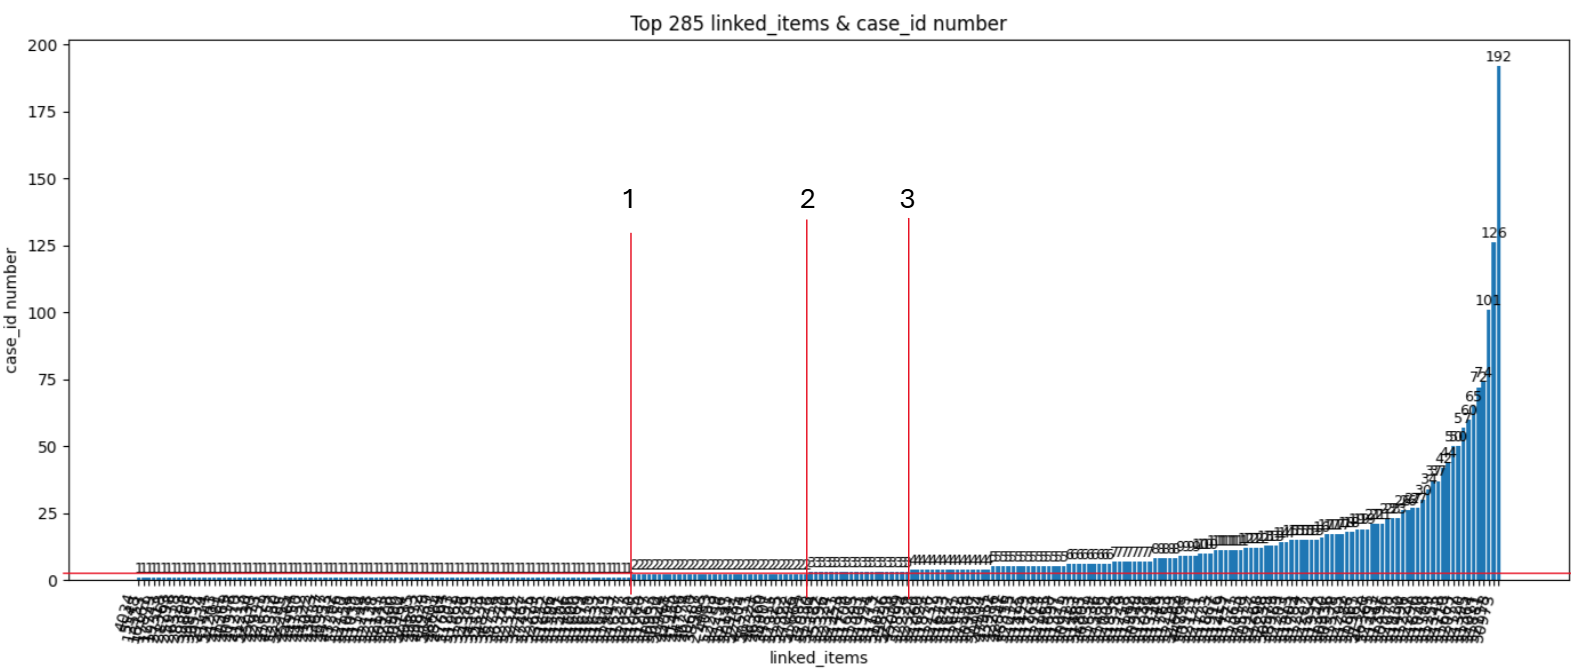

In [ ]:
# 暂时把小于5的数据都删掉？不然都没法划分X,y
# 5-fold split

import pandas as pd
import ast

# ---- 1) 统一把 linked_items 解析成 list ----
def to_list(x):
    if isinstance(x, list):
        return x
    if pd.isna(x):
        return []
    if isinstance(x, str):
        # 兼容 '["A","B"]' 或 "['A','B']" 等字符串
        try:
            v = ast.literal_eval(x)
            return v if isinstance(v, list) else [v]
        except Exception:
            return [x]
    return [x]

df["linked_items"] = df["linked_items"].apply(to_list)

# ---- 2) explode：一行一个标签（解决 list 不可哈希问题）----
df_exp = df.explode("linked_items").reset_index(drop=True)

# 统一成字符串，避免 123 vs "123" 的类型不一致
df_exp["linked_items"] = df_exp["linked_items"].astype(str).str.strip()

# 现在可以安全统计
total_samples = len(df_exp)
num_classes = df_exp["linked_items"].nunique()
print(f"展开后样本数: {total_samples}, 类别数: {num_classes}")

# ---- 3) 过滤掉样本数 <5 的类别，保证 5-fold 可用 ----
counts = df_exp["linked_items"].value_counts()
valid_items = counts[counts >= 5].index

df_filtered = df_exp[df_exp["linked_items"].isin(valid_items)].reset_index(drop=True)

print(f"原始类别数: {num_classes} -> 过滤后类别数: {df_filtered['linked_items'].nunique()}")
print(f"原始样本数(展开): {total_samples} -> 过滤后样本数: {len(df_filtered)}")

# ---- 4) 分层 5 折划分（保证每类每折至少1条）----
from sklearn.model_selection import StratifiedKFold
import numpy as np

X = df_filtered[["case_title", "performed_work"]]
y = df_filtered["linked_items"]  # 现在是标量字符串，不是 list

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_idx, val_idx) in enumerate(skf.split(np.zeros(len(y)), y), 1):
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
    print(f"Fold {fold}: 训练{len(train_idx)} 验证{len(val_idx)} | "
          f"训练类数{y_train.nunique()} 验证类数{y_val.nunique()}")


C:\Users\ux018677\AppData\Local\Temp\ipykernel_22888\790995889.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["linked_items"] = df["linked_items"].apply(to_list)


展开后样本数: 2362, 类别数: 270
原始类别数: 270 -> 过滤后类别数: 102
原始样本数(展开): 2362 -> 过滤后样本数: 2072
Fold 1: 训练1657 验证415 | 训练类数102 验证类数102
Fold 2: 训练1657 验证415 | 训练类数102 验证类数102
Fold 3: 训练1658 验证414 | 训练类数102 验证类数102
Fold 4: 训练1658 验证414 | 训练类数102 验证类数102
Fold 5: 训练1658 验证414 | 训练类数102 验证类数102


In [60]:
df_filtered.to_csv("./output/df_filtered.csv")
X.to_csv("./output/X.csv")
y.to_csv("./output/y.csv")

In [ ]:
# 2072x2 -> [?xxx?] -> softmax -> 102



In [56]:
from sklearn.model_selection import StratifiedGroupKFold
import numpy as np

# 文本与标签
X = df_filtered[["case_title", "performed_work"]]
y = df_filtered["linked_items"].astype(str)
groups = df_filtered["case_id"]  # 关键：按 case_id 分组，避免同一 case 跨折

sgkf = StratifiedGroupKFold(n_splits=5, shuffle=True, random_state=42)

for fold, (tr, va) in enumerate(sgkf.split(X, y, groups=groups), 1):
    y_tr, y_va = y.iloc[tr], y.iloc[va]
    print(f"Fold {fold}: 训练{len(tr)} 验证{len(va)} | 训练类数{y_tr.nunique()} 验证类数{y_va.nunique()}")

# 
fold_indices = []
for tr, va in sgkf.split(X, y, groups=groups):
    fold_indices.append({"train_idx": tr, "val_idx": va})

# 示例：保存第1折数据
fold0 = fold_indices[0]
X_train = X.iloc[fold0["train_idx"]];  y_train = y.iloc[fold0["train_idx"]]
X_val   = X.iloc[fold0["val_idx"]];    y_val   = y.iloc[fold0["val_idx"]]

# 
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

classes = np.sort(y.unique())
weights = compute_class_weight(class_weight="balanced", classes=classes, y=y)
class_weight = dict(zip(classes, weights))

print("类数：", len(classes))
print("最小/中位/最大支持度：", 
      y.value_counts().min(), y.value_counts().median(), y.value_counts().max())
print("示例类别权重（前10）：", list(class_weight.items())[:10])


Fold 1: 训练1659 验证413 | 训练类数102 验证类数81
Fold 2: 训练1659 验证413 | 训练类数102 验证类数91
Fold 3: 训练1663 验证409 | 训练类数102 验证类数87
Fold 4: 训练1657 验证415 | 训练类数102 验证类数87
Fold 5: 训练1650 验证422 | 训练类数102 验证类数95
类数： 102
最小/中位/最大支持度： 5 11.5 192
示例类别权重（前10）： [('36039', np.float64(3.3856209150326797)), ('38989', np.float64(1.4509803921568627)), ('42211', np.float64(4.0627450980392155)), ('42846', np.float64(4.0627450980392155)), ('43986', np.float64(4.0627450980392155)), ('44725', np.float64(2.2570806100217866)), ('46365', np.float64(0.9673202614379085)), ('47952', np.float64(4.0627450980392155)), ('48355', np.float64(4.0627450980392155)), ('50923', np.float64(3.3856209150326797))]


In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, f1_score

# 拼接中文文本
text_all = (df_filtered["case_title"].fillna("") + " " + df_filtered["performed_work"].fillna("")).values
labels = df_filtered["linked_items"].astype(str).values

# 同步使用分组分层的第1折
fold0 = fold_indices[0]
train_idx, val_idx = fold0["train_idx"], fold0["val_idx"]
text_tr, text_va = text_all[train_idx], text_all[val_idx]
y_tr, y_va = labels[train_idx], labels[val_idx]

# 向量化
tfidf = TfidfVectorizer(max_features=100_000, ngram_range=(1,2))
X_tr = tfidf.fit_transform(text_tr)
X_va = tfidf.transform(text_va)

# 标签编码
le = LabelEncoder()
y_tr_enc = le.fit_transform(y_tr)
y_va_enc = le.transform(y_va)

# 训练（带类平衡）
clf = LogisticRegression(
    max_iter=2000, n_jobs=-1, class_weight="balanced", multi_class="ovr"
)
clf.fit(X_tr, y_tr_enc)

# 评估
pred = clf.predict(X_va)
print("macro-F1:", f1_score(y_va_enc, pred, average="macro"))
print("weighted-F1:", f1_score(y_va_enc, pred, average="weighted"))


val_labels = np.unique(y_va_enc)  # 验证集中真实出现的类索引
val_names  = le.inverse_transform(val_labels)  # 对应的原始类名

print(classification_report(
    y_va_enc, pred,
    labels=val_labels,
    target_names=val_names,
    zero_division=0
))



# 
# 每类最少样本应≥5
assert df_filtered["linked_items"].value_counts().min() >= 5

# 验证每折类覆盖一致（分组分层后）
for i, f in enumerate(fold_indices, 1):
    y_tr = y.iloc[f["train_idx"]]; y_va = y.iloc[f["val_idx"]]
    print(f"Fold {i}: 训练类{y_tr.nunique()} / 验证类{y_va.nunique()}")


c:\Users\ux018677\AppData\Local\miniconda3\envs\beacon\Lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


macro-F1: 0.3641476941964185
weighted-F1: 0.5295757302628257
              precision    recall  f1-score   support

       36039       0.00      0.00      0.00         2
       42211       0.00      0.00      0.00         1
       42846       0.00      0.00      0.00         1
       46365       0.50      0.33      0.40         6
       48355       0.00      0.00      0.00         1
       50923       0.00      0.00      0.00         1
       50937       0.00      0.00      0.00         1
       50938       0.00      0.00      0.00         4
       50962       0.00      0.00      0.00         2
       50970       0.67      0.67      0.67         3
       50971       0.00      0.00      0.00         3
       50973       0.89      0.87      0.88        38
       50979       0.50      0.25      0.33         4
       51048       1.00      0.67      0.80         3
       51094       1.00      0.50      0.67         2
       51109       0.80      0.67      0.73        12
       51110       1